# CLASSIFICATION OF LAB SAMPLES

This notebook analyzes the AM_MDM and AW_plus_v_AW_neg samples.

# Preliminaries

In [1]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common import trinary_data
from common_python.plots import util_plots
from common_python.classifier import classifier_ensemble
from common_python.classifier import classifier_collection
from common import transform_data

import collections
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Data
Data used in the analysis.

In [2]:
DATA = TrinaryData(is_regulator=False, is_dropT1=True, is_averaged=True)
DATA.df_X.head()

,Rv1927,Rv1129c,Rv3085,Rv3083,Rv3086,Rv2226,Rv0260c,Rv1365c,Rv3084,Rv0975c,...,Rv3267,Rv2748c,Rv3260c,Rv0350,Rv2737c,Rv0440--Rv3417c,Rv2734,Rv0519c,Rv3418c,Rv3269
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Not averaged
DATA = TrinaryData(is_regulator=False, is_averaged=True, is_dropT1=True)
DATA.df_X.head()

,Rv1927,Rv1129c,Rv3085,Rv3083,Rv3086,Rv2226,Rv0260c,Rv1365c,Rv3084,Rv0975c,...,Rv3267,Rv2748c,Rv3260c,Rv0350,Rv2737c,Rv0440--Rv3417c,Rv2734,Rv0519c,Rv3418c,Rv3269
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
DATA.ser_y.head()

timepoint
T2    1
T3    1
T4    1
T5    1
T6    1
Name: name, dtype: int64

# Lab Samples

In [5]:
def sortColumns(df):
    columns = list(df.columns)
    columns.sort()
    df.columns = columns
    df = df.sort_index()
    return df

In [6]:
def getSampleData(**kwargs):
    sample_data = trinary_data.getSampleData(**kwargs)
    dct = {}
    for sample in trinary_data.SAMPLES:
        dct[sample] = sortColumns(sample_data.__getattribute__(sample))
    return dct
        
SAMPLE_CURATED_REF_DCT = getSampleData(is_regulator=False, is_curated_ref=True)
SAMPLE_UNCURATED_REF_DCT = getSampleData(is_regulator=False, is_curated_ref=False)

(array([ 163.,    0.,    0.,    0.,    0.,  360.,    0.,    0.,    0.,
           0., 5835.,    0.,    0.,    0.,    0., 5018.,    0.,    0.,
           0., 1534.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

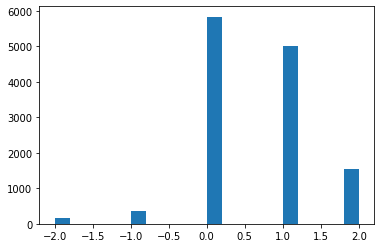

In [8]:
df = SAMPLE_CURATED_REF_DCT["AM_MDM"] - SAMPLE_UNCURATED_REF_DCT["AM_MDM"]
df = df.T.dropna(axis=1, how='all').T
plt.hist(df.values.flatten(), bins=20)

# Classification Validations on Training Samples
Classify T2-T25 and see if result is same as original class. Use 5-fold cross validation, where there is a holdout for each class and the selection is random.


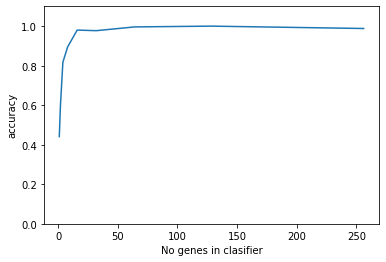

In [9]:
accuracy_dct = {}
for rank in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
    accuracy_dct[rank] = classifier_ensemble.ClassifierEnsemble.crossValidate(
        DATA, num_iter=10, num_holdout=1, filter_high_rank=rank, size=20)
plt.plot(list(accuracy_dct.keys()), list(accuracy_dct.values()))
plt.ylim([0, 1.1])
_ = plt.xlabel("No genes in clasifier")
_ = plt.ylabel("accuracy")

# Classification of Other Samples

In [32]:
svm_ensemble = classifier_ensemble.ClassifierEnsemble(
        classifier_ensemble.ClassifierDescriptorSVM(), filter_high_rank=10, size=100)
svm_ensemble.fit(DATA.df_X, DATA.ser_y)

In [25]:
svm_ensemble.predict(SAMPLE_CURATED_REF_DCT["AM_MDM"])

,0,1,2,3,4
AM_D20_1,0.0,0.00,0.10,0.00,0.90
AM_D20_3,0.0,0.00,0.00,1.00,0.00
AM_D20_4,0.0,0.00,0.48,0.00,0.52
AM_D20_5,0.0,0.00,0.10,0.00,0.90
MDM_D20_1,0.0,1.00,0.00,0.00,0.00
MDM_D20_3,0.0,1.00,0.00,0.00,0.00
MDM_D20_4,0.0,0.96,0.00,0.04,0.00
MDM_D20_5,0.0,0.00,1.00,0.00,0.00


In [26]:
svm_ensemble.predict(SAMPLE_UNCURATED_REF_DCT["AM_MDM"])

,0,1,2,3,4
AM_D20_1,0.0,0.87,0.13,0.0,0.0
MDM_D20_1,0.0,0.87,0.13,0.0,0.0
MDM_D20_3,0.0,0.87,0.13,0.0,0.0
MDM_D20_4,0.0,0.87,0.13,0.0,0.0
MDM_D20_5,0.0,0.87,0.13,0.0,0.0


In [ ]:
# Combine states - 0 + 4 == neg; 1,2,3 = pos
# Use uncurated baseline for AW, others?

In [33]:
for sample, df_X in SAMPLE_CURATED_REF_DCT.items():
    print("\n\n%s" % sample)
    print(svm_ensemble.predict(df_X))



AM_MDM
             0     1     2    3     4
AM_D20_1   0.0  0.00  0.16  0.0  0.84
AM_D20_3   0.0  0.00  0.05  0.0  0.95
AM_D20_4   0.0  0.00  0.00  0.0  1.00
AM_D20_5   0.0  0.00  0.16  0.0  0.84
MDM_D20_1  0.0  0.96  0.00  0.0  0.04
MDM_D20_3  0.0  0.96  0.00  0.0  0.04
MDM_D20_4  0.0  0.00  0.95  0.0  0.05
MDM_D20_5  0.0  0.96  0.00  0.0  0.04


AW
             0    1     2    3     4
AW_neg_1   0.0  0.0  1.00  0.0  0.00
AW_neg_3   0.0  0.0  0.00  0.0  1.00
AW_neg_4   0.0  1.0  0.00  0.0  0.00
AW_plus_1  0.0  1.0  0.00  0.0  0.00
AW_plus_3  0.0  0.0  0.95  0.0  0.05
AW_plus_4  0.0  0.0  1.00  0.0  0.00


sherman
     0    1     2    3     4
0  0.0  0.0  0.05  0.0  0.95


galagan
            0     1     2     3     4
d1.rep1  0.00  0.00  1.00  0.00  0.00
d1.rep2  0.00  0.00  1.00  0.00  0.00
d1.rep3  0.00  0.00  1.00  0.00  0.00
d2.rep1  0.09  0.00  0.91  0.00  0.00
d2.rep2  0.00  0.05  0.95  0.00  0.00
d2.rep3  0.05  0.00  0.95  0.00  0.00
d3.rep1  0.06  0.00  0.94  0.00  0.00
d3.